
# E-Commerce Data Analysis Project

## Exploratory Data Analysis & Customer Segmentation



**Nama:** ABI RAFDI HASBUR RAHMAN   
**Dataset:** E-Commerce Public Dataset (Olist)  
**Tujuan Proyek:**  
Proyek ini bertujuan untuk menganalisis performa bisnis e-commerce, mengidentifikasi segmentasi pelanggan berdasarkan perilaku transaksi, serta mengevaluasi pengaruh kualitas pengiriman terhadap tingkat kepuasan pelanggan.

---

## Business Questions


Berdasarkan konteks bisnis e-commerce, analisis ini berfokus pada tiga pertanyaan utama:

1. Bagaimana tren jumlah order dan revenue dari waktu ke waktu, serta periode apa yang mengalami penurunan signifikan?
2. Segmen pelanggan mana yang paling bernilai berdasarkan pendekatan RFM (Recency, Frequency, Monetary), dan bagaimana kontribusi masing-masing segmen terhadap total revenue?
3. Apakah keterlambatan pengiriman memiliki pengaruh terhadap tingkat kepuasan pelanggan yang direpresentasikan oleh review score?

## Data Understanding

Dataset yang digunakan merupakan E-Commerce Public Dataset (Olist), yang berisi informasi transaksi, pelanggan, produk, metode pembayaran, pengiriman, dan ulasan pelanggan.

Beberapa tabel utama yang digunakan dalam analisis ini antara lain:
- orders
- order_items
- customers
- payments
- reviews

Tahap ini bertujuan untuk memahami struktur data, tipe variabel, serta relasi antar tabel.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv('orders_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')
payments = pd.read_csv('order_payments_dataset.csv')
reviews = pd.read_csv('order_reviews_dataset.csv')

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Data Cleaning & Preprocessing

Tahap ini dilakukan untuk memastikan kualitas data sebelum analisis lebih lanjut, meliputi:
- Konversi kolom tanggal ke format datetime
- Menghapus data transaksi yang belum selesai atau dibatalkan
- Menggabungkan beberapa tabel untuk membentuk dataset analisis

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
orders.isna().sum(), reviews.isna().sum()

(order_id                            0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_approved_at                 160
 order_delivered_carrier_date     1783
 order_delivered_customer_date    2965
 order_estimated_delivery_date       0
 dtype: int64,
 review_id                      0
 order_id                       0
 review_score                   0
 review_comment_title       87656
 review_comment_message     58247
 review_creation_date           0
 review_answer_timestamp        0
 dtype: int64)

In [ ]:
print("Duplicate rows check:")
print("orders:", orders.duplicated().sum())
print("order_items:", order_items.duplicated().sum())
print("customers:", customers.duplicated().sum())
print("payments:", payments.duplicated().sum())
print("reviews:", reviews.duplicated().sum())

Duplicate rows check:
orders: 0
order_items: 0
customers: 0
payments: 0
reviews: 0


In [ ]:
date_cols_orders = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

In [ ]:
for col in date_cols_orders:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

In [ ]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], errors='coerce')
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], errors='coerce')


In [ ]:
orders[date_cols_orders].dtypes


,0
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


In [ ]:
orders['order_status'].value_counts()


,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
orders_clean = orders[orders['order_status'] == 'delivered'].copy()

In [ ]:
print("Jumlah orders sebelum filter:", len(orders))
print("Jumlah orders setelah filter delivered:", len(orders_clean))

Jumlah orders sebelum filter: 99441
Jumlah orders setelah filter delivered: 96478


In [ ]:
orders_clean = orders_clean.dropna(subset=['order_delivered_customer_date'])

In [ ]:
print("Jumlah orders_clean setelah drop delivered date null:", len(orders_clean))

Jumlah orders_clean setelah drop delivered date null: 96470


In [ ]:
valid_order_ids = set(orders_clean['order_id'])
order_items_clean = order_items[order_items['order_id'].isin(valid_order_ids)].copy()

In [ ]:
print("Order items sebelum filter:", len(order_items))
print("Order items setelah filter valid orders:", len(order_items_clean))


Order items sebelum filter: 112650
Order items setelah filter valid orders: 110189


In [ ]:
df = orders_clean.merge(order_items_clean, on='order_id', how='left') \
                 .merge(customers, on='customer_id', how='left') \
                 .merge(reviews[['order_id', 'review_score']], on='order_id', how='left')

In [ ]:
df.shape

(110832, 19)

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0


In [ ]:
df['revenue'] = df['price']

In [ ]:
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days


In [ ]:
df[['revenue', 'delivery_delay_days']].describe()


,revenue,delivery_delay_days
count,110832.000000,110832.000000
mean,119.808245,-12.034656
std,181.961263,10.158015
min,0.850000,-147.000000
25%,39.900000,-17.000000
50%,74.900000,-13.000000
75%,133.900000,-7.000000
max,6735.000000,188.000000


In [ ]:
df_review = df.dropna(subset=['review_score']).copy()
df_review['review_score'] = df_review['review_score'].astype(int)


In [ ]:
print("df total:", len(df))
print("df_review (punya review_score):", len(df_review))

df total: 110832
df_review (punya review_score): 110005


In [ ]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
df[['order_purchase_timestamp','order_month']].head()


,order_purchase_timestamp,order_month
0,2017-10-02 10:56:33,2017-10-01
1,2018-07-24 20:41:37,2018-07-01
2,2018-08-08 08:38:49,2018-08-01
3,2017-11-18 19:28:06,2017-11-01
4,2018-02-13 21:18:39,2018-02-01


In [ ]:
print("Kolom penting check:")
print("order_purchase_timestamp null:", df['order_purchase_timestamp'].isna().sum())
print("revenue null:", df['revenue'].isna().sum())
print("delivery_delay_days null:", df['delivery_delay_days'].isna().sum())
print("review_score null (di df_review harus 0):", df_review['review_score'].isna().sum())

df.info()

Kolom penting check:
order_purchase_timestamp null: 0
revenue null: 0
delivery_delay_days null: 0
review_score null (di df_review harus 0): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110832 entries, 0 to 110831
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110832 non-null  object        
 1   customer_id                    110832 non-null  object        
 2   order_status                   110832 non-null  object        
 3   order_purchase_timestamp       110832 non-null  datetime64[ns]
 4   order_approved_at              110817 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110831 non-null  datetime64[ns]
 6   order_delivered_customer_date  110832 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110832 non-null  datetime64[ns]
 8   order_item_id                  110832 non-null  int64         

Setelah tahap cleaning dan preprocessing, dataset telah siap digunakan untuk EDA dan analisis lanjutan.
Dataset utama (`df`) digunakan untuk tren penjualan dan segmentasi pelanggan, sedangkan dataset khusus ulasan (`df_review`) digunakan untuk analisis hubungan keterlambatan pengiriman dengan review score.


## Exploratory Data Analysis (EDA)

### EDA 1: Tren Order dan Revenue

Analisis ini bertujuan untuk memahami perkembangan performa bisnis e-commerce dari waktu ke waktu
dengan melihat tren jumlah order dan total revenue per bulan.
Hasil analisis ini dapat digunakan sebagai dasar evaluasi performa dan perencanaan strategi bisnis.

In [ ]:
# Agregasi bulanan: jumlah order & total revenue
monthly_perf = (
    df.groupby('order_month')
      .agg(
          total_orders=('order_id', 'nunique'),
          total_revenue=('revenue', 'sum')
      )
      .reset_index()
)

In [ ]:
monthly_perf.head()

,order_month,total_orders,total_revenue
0,2016-09-01,1,134.97
1,2016-10-01,265,40451.80
2,2016-12-01,1,10.90
3,2017-01-01,750,112573.39
4,2017-02-01,1653,235483.40


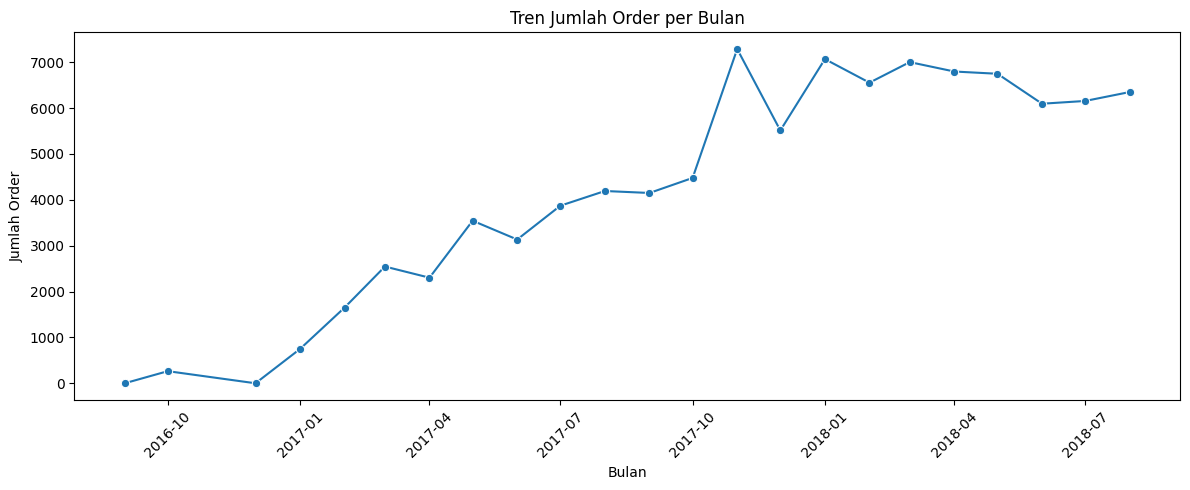

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_perf,
    x='order_month',
    y='total_orders',
    marker='o'
)

plt.title('Tren Jumlah Order per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


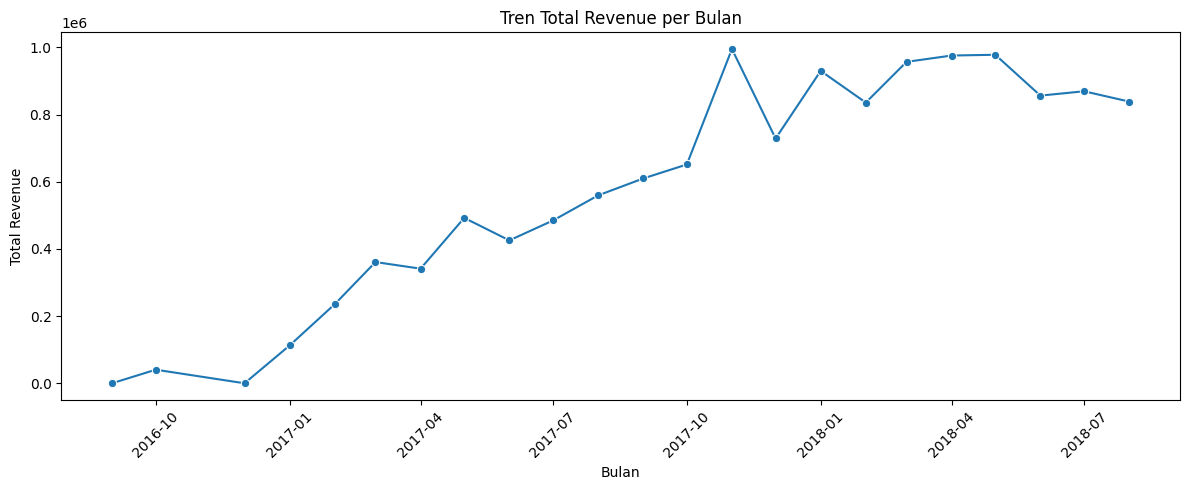

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_perf,
    x='order_month',
    y='total_revenue',
    marker='o'
)

plt.title('Tren Total Revenue per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
monthly_perf['order_growth_pct'] = monthly_perf['total_orders'].pct_change() * 100
monthly_perf['revenue_growth_pct'] = monthly_perf['total_revenue'].pct_change() * 100

monthly_perf[['order_month','order_growth_pct','revenue_growth_pct']].head()


,order_month,order_growth_pct,revenue_growth_pct
0,2016-09-01,NaN,NaN
1,2016-10-01,26400.000000,2.987096e+04
2,2016-12-01,-99.622642,-9.997305e+01
3,2017-01-01,74900.000000,1.032683e+06
4,2017-02-01,120.400000,1.091821e+02


In [ ]:
decline_months = monthly_perf[
    (monthly_perf['order_growth_pct'] < 0) |
    (monthly_perf['revenue_growth_pct'] < 0)
]

decline_months


,order_month,total_orders,total_revenue,order_growth_pct,revenue_growth_pct
2,2016-12-01,1,10.90,-99.622642,-99.973054
6,2017-04-01,2303,341209.62,-9.544383,-5.446806
8,2017-06-01,3135,425387.66,-11.565585,-13.616600
11,2017-09-01,4150,609750.15,-1.025519,9.016915
14,2017-12-01,5513,728836.17,-24.355104,-26.756217
16,2018-02-01,6555,835720.63,-7.271184,-10.140170
18,2018-04-01,6798,975779.41,-2.927317,1.970423
19,2018-05-01,6749,978065.68,-0.720800,0.234302
20,2018-06-01,6096,856423.90,-9.675507,-12.436975
22,2018-08-01,6351,838650.76,3.167641,-3.534115


#### Insight Tren Order & Revenue

Berdasarkan visualisasi tren jumlah order dan total revenue per bulan, diperoleh beberapa temuan utama sebagai berikut:

1. Pada periode awal (akhir 2016), jumlah order dan revenue masih relatif rendah dan belum menunjukkan pola yang stabil.
   Hal ini mengindikasikan fase awal pertumbuhan platform e-commerce.

2. Memasuki tahun 2017, terjadi peningkatan jumlah order dan revenue yang cukup konsisten hingga sekitar pertengahan tahun,
   menunjukkan adanya pertumbuhan aktivitas transaksi dan peningkatan kepercayaan pelanggan.

3. Puncak jumlah order dan revenue terlihat pada kuartal akhir tahun 2017, yang kemungkinan dipengaruhi oleh faktor musiman
   seperti kampanye promosi akhir tahun atau meningkatnya permintaan konsumen.

4. Setelah mencapai puncak tersebut, pada awal tahun 2018 terlihat fluktuasi dengan beberapa periode penurunan,
   baik pada jumlah order maupun revenue. Namun secara umum, performa masih berada pada level yang lebih tinggi
   dibandingkan periode awal analisis.

5. Pergerakan revenue tidak selalu sejalan secara proporsional dengan jumlah order.
   Pada beberapa periode, revenue tetap tinggi meskipun jumlah order menurun,
   yang mengindikasikan adanya peningkatan nilai transaksi rata-rata (average order value).

Temuan ini menunjukkan bahwa selain jumlah transaksi, strategi peningkatan nilai transaksi per pelanggan
juga berperan penting dalam menjaga performa revenue, terutama pada periode ketika volume order mengalami fluktuasi.


### EDA 2: Customer Segmentation menggunakan RFM Analysis

RFM Analysis digunakan untuk mengelompokkan pelanggan berdasarkan:
- Recency: jarak waktu sejak transaksi terakhir
- Frequency: jumlah transaksi
- Monetary: total nilai transaksi

Pendekatan ini membantu mengidentifikasi pelanggan bernilai tinggi dan menyusun prioritas strategi pemasaran
tanpa menggunakan metode machine learning.

In [ ]:
reference_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2018-08-30 15:00:37')

In [ ]:
rfm = (
    df.groupby('customer_unique_id')
      .agg(
          Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
          Frequency=('order_id', 'nunique'),
          Monetary=('revenue', 'sum')
      )
      .reset_index()
)


In [ ]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,93350.000000,93350.000000,93350.000000
mean,237.950070,1.033423,142.245178
std,152.589932,0.209106,216.939307
min,1.000000,1.000000,0.850000
25%,114.000000,1.000000,47.800000
50%,219.000000,1.000000,89.900000
75%,346.000000,1.000000,155.000000
max,714.000000,15.000000,13440.000000


In [ ]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm[['Recency','Frequency','Monetary','R_score','F_score','M_score']].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
0,112,1,129.90,4,1,3
1,115,1,18.90,3,1,1
2,537,1,69.00,1,1,2
3,321,1,25.99,2,1,1
4,288,1,180.00,2,1,4


In [ ]:
rfm['RFM_score'] = (
    rfm['R_score'].astype(int) +
    rfm['F_score'].astype(int) +
    rfm['M_score'].astype(int)
)

In [ ]:
def rfm_segment(score):
    if score >= 10:
        return 'High Value'
    elif score >= 7:
        return 'Medium Value'
    else:
        return 'Low Value'


In [ ]:
rfm['Segment'] = rfm['RFM_score'].apply(rfm_segment)
rfm['Segment'].value_counts()

,count
Segment,
Medium Value,48715
Low Value,29651
High Value,14984


In [ ]:
segment_summary = (
    rfm.merge(df[['customer_unique_id','revenue']], on='customer_unique_id', how='left')
       .groupby('Segment')
       .agg(
           total_customers=('customer_unique_id','nunique'),
           total_revenue=('revenue','sum')
       )
       .reset_index()
)

In [ ]:
segment_summary

,Segment,total_customers,total_revenue
0,High Value,14984,3934114.56
1,Low Value,29651,2050182.83
2,Medium Value,48715,7294290.02


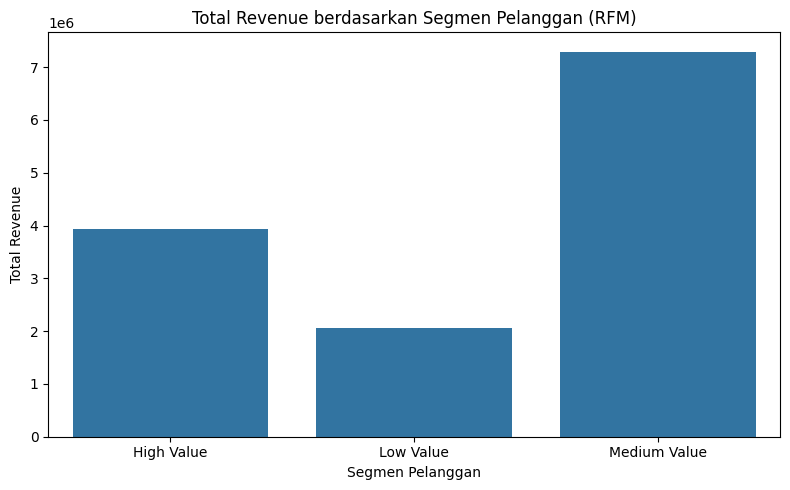

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=segment_summary,
    x='Segment',
    y='total_revenue'
)

plt.title('Total Revenue berdasarkan Segmen Pelanggan (RFM)')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

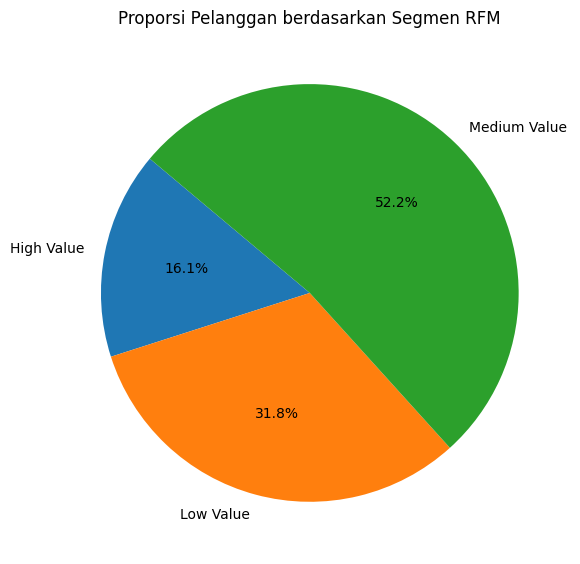

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    segment_summary['total_customers'],
    labels=segment_summary['Segment'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proporsi Pelanggan berdasarkan Segmen RFM')
plt.tight_layout()
plt.show()

#### Insight Customer Segmentation (RFM)

Berdasarkan hasil RFM Analysis dan visualisasi total revenue per segmen pelanggan,
diperoleh beberapa temuan utama sebagai berikut:

1. Segmen **Medium Value** memberikan kontribusi total revenue paling besar dibandingkan segmen lainnya.
   Hal ini menunjukkan bahwa meskipun pelanggan pada segmen ini tidak selalu memiliki skor RFM tertinggi,
   jumlah pelanggan yang relatif besar dengan frekuensi transaksi yang cukup konsisten
   menjadikan segmen ini sebagai tulang punggung pendapatan bisnis.

2. Segmen **High Value** berada pada posisi kedua dalam kontribusi revenue.
   Meskipun jumlah pelanggannya lebih sedikit dibandingkan segmen Medium Value,
   pelanggan pada segmen ini memiliki nilai transaksi dan tingkat loyalitas yang lebih tinggi,
   sehingga tetap menjadi segmen strategis yang perlu dipertahankan melalui program retensi.

3. Segmen **Low Value** memiliki kontribusi revenue paling rendah.
   Hal ini mengindikasikan bahwa pelanggan pada segmen ini cenderung memiliki frekuensi transaksi
   dan nilai pembelian yang lebih kecil, sehingga diperlukan strategi reaktivasi yang lebih selektif
   dan efisien dari sisi biaya pemasaran.

Hasil segmentasi ini menunjukkan bahwa strategi bisnis tidak hanya perlu berfokus pada pelanggan bernilai tinggi,
tetapi juga pada segmen menengah yang secara agregat memberikan kontribusi pendapatan terbesar.
Pendekatan yang seimbang antara retensi pelanggan bernilai tinggi dan optimalisasi segmen menengah
dapat membantu menjaga stabilitas revenue dalam jangka panjang.


### EDA 3: Pengaruh Keterlambatan Pengiriman terhadap Review Score

Analisis ini bertujuan untuk mengevaluasi apakah keterlambatan pengiriman
berpengaruh terhadap tingkat kepuasan pelanggan yang direpresentasikan oleh review score.

In [ ]:
df_review['delivery_delay_days'].describe()

,delivery_delay_days
count,110005.000000
mean,-12.069579
std,10.090283
min,-147.000000
25%,-17.000000
50%,-13.000000
75%,-7.000000
max,188.000000


In [ ]:
def delay_category(days):
    if days <= 0:
        return 'On Time / Early'
    elif days <= 3:
        return 'Slightly Late (1–3 days)'
    else:
        return 'Late (>3 days)'

In [ ]:
df_review['delivery_category'] = df_review['delivery_delay_days'].apply(delay_category)
df_review['delivery_category'].value_counts()

,count
delivery_category,
On Time / Early,102893
Late (>3 days),5019
Slightly Late (1–3 days),2093


In [ ]:
review_by_delivery = (
    df_review.groupby('delivery_category')
             .agg(
                 avg_review_score=('review_score','mean'),
                 median_review_score=('review_score','median'),
                 total_reviews=('review_score','count')
             )
             .reset_index()
)

In [ ]:
review_by_delivery

,delivery_category,avg_review_score,median_review_score,total_reviews
0,Late (>3 days),1.850966,1.0,5019
1,On Time / Early,4.207410,5.0,102893
2,Slightly Late (1–3 days),3.228858,4.0,2093


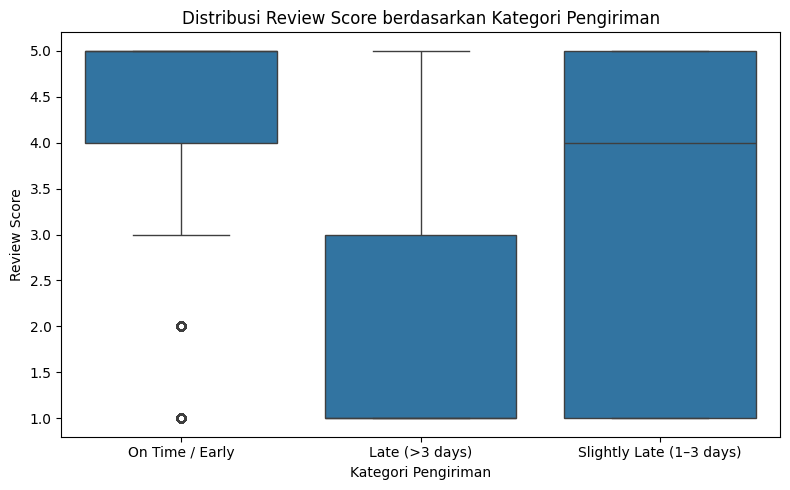

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_review,
    x='delivery_category',
    y='review_score'
)

plt.title('Distribusi Review Score berdasarkan Kategori Pengiriman')
plt.xlabel('Kategori Pengiriman')
plt.ylabel('Review Score')
plt.tight_layout()
plt.show()

In [ ]:
correlation = df_review[['delivery_delay_days','review_score']].corr()
correlation

,delivery_delay_days,review_score
delivery_delay_days,1.000000,-0.229224
review_score,-0.229224,1.000000


#### Insight Keterlambatan Pengiriman dan Review Score

Berdasarkan hasil analisis, diperoleh beberapa temuan utama sebagai berikut:

1. Pelanggan yang menerima pesanan **tepat waktu atau lebih cepat dari estimasi**
   cenderung memberikan review score yang lebih tinggi dan stabil dibandingkan kategori lainnya.

2. Pada kategori **keterlambatan ringan (1–3 hari)**, terlihat penurunan rata-rata review score,
   yang mengindikasikan bahwa keterlambatan dalam skala kecil tetap mempengaruhi persepsi pelanggan.

3. Kategori **keterlambatan lebih dari 3 hari** menunjukkan sebaran review score yang lebih rendah
   dan lebih variatif, menandakan meningkatnya ketidakpuasan pelanggan seiring bertambahnya durasi keterlambatan.

4. Hasil korelasi menunjukkan adanya hubungan negatif antara keterlambatan pengiriman dan review score,
   meskipun kekuatannya tidak terlalu besar, yang mengindikasikan bahwa faktor pengiriman
   merupakan salah satu aspek penting dalam membentuk kepuasan pelanggan.


## Business Insights

Berdasarkan hasil analisis, diperoleh beberapa insight utama:
- Hasil segmentasi ini menunjukkan bahwa strategi bisnis tidak hanya perlu berfokus pada pelanggan bernilai tinggi,
tetapi juga pada segmen menengah yang secara agregat memberikan kontribusi pendapatan terbesar.
Pendekatan yang seimbang antara retensi pelanggan bernilai tinggi dan optimalisasi segmen menengah
dapat membantu menjaga stabilitas revenue dalam jangka panjang.
- ...
- ...


## Conclusion

Berdasarkan hasil Exploratory Data Analysis (EDA) yang telah dilakukan pada E-Commerce Public Dataset (Olist),
dapat ditarik beberapa kesimpulan utama sebagai berikut:

1. Performa penjualan e-commerce menunjukkan tren pertumbuhan yang cukup signifikan dari waktu ke waktu,
   dengan puncak jumlah order dan revenue terjadi pada periode akhir tahun,
   yang mengindikasikan adanya pengaruh faktor musiman dan aktivitas promosi.

2. Hasil Customer Segmentation menggunakan RFM Analysis menunjukkan bahwa segmen **Medium Value**
   memberikan kontribusi revenue terbesar secara agregat,
   sementara segmen **High Value** meskipun jumlah pelanggannya lebih sedikit,
   tetap memiliki peran strategis karena nilai transaksi dan loyalitas yang lebih tinggi.

3. Analisis keterlambatan pengiriman menunjukkan adanya hubungan negatif antara durasi keterlambatan
   dan tingkat kepuasan pelanggan yang direpresentasikan oleh review score.
   Semakin lama keterlambatan pengiriman, semakin besar potensi penurunan kepuasan pelanggan.

Secara keseluruhan, hasil analisis ini menegaskan bahwa performa bisnis e-commerce
tidak hanya ditentukan oleh volume transaksi,
tetapi juga oleh kualitas layanan pengiriman dan strategi pengelolaan pelanggan yang tepat.

## Streamlit Dashboard

Sebagai pelengkap analisis, dibuat dashboard interaktif menggunakan Streamlit untuk memvisualisasikan hasil analisis secara ringkas dan mudah dipahami.

In [ ]:
df.to_csv('df_final.csv', index=False)